In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint, adfuller
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

In [ ]:
# # 数据获取函数
# def fetch_oil_data():
#     """获取WTI和布伦特原油数据"""
#     wti_ticker = 'CL=F'
#     brent_ticker = 'BZ=F'
    
#     start_date_train = '2020-07-01'
#     end_date_train = '2025-07-31'
#     start_date_test = '2025-08-01'
#     end_date_test = '2025-08-31'
    
#     # 获取训练数据
#     wti_train = yf.download(wti_ticker, start=start_date_train, end=end_date_train)
#     brent_train = yf.download(brent_ticker, start=start_date_train, end=end_date_train)
    
#     # 获取测试数据
#     wti_test = yf.download(wti_ticker, start=start_date_test, end=end_date_test)
#     brent_test = yf.download(brent_ticker, start=start_date_test, end=end_date_test)
    
#     return wti_train, brent_train, wti_test, brent_test

# # 数据预处理
# def preprocess_data(wti, brent):
#     """预处理数据，确保日期对齐"""
#     # 只保留收盘价
#     wti_close = wti[['Close']].rename(columns={'Close': 'WTI'})
#     brent_close = brent[['Close']].rename(columns={'Close': 'Brent'})
    
#     # 合并数据
#     combined = pd.concat([wti_close, brent_close], axis=1)
#     combined = combined.dropna()  # 移除缺失值
    
#     return combined

# # 获取并预处理数据
# wti_train, brent_train, wti_test, brent_test = fetch_oil_data()
# train_data = preprocess_data(wti_train, brent_train)
# test_data = preprocess_data(wti_test, brent_test)

# print("训练数据形状:", train_data.shape)
# print("测试数据形状:", test_data.shape)
# print("\n训练数据前5行:")
# print(train_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


训练数据形状: (1278, 2)
测试数据形状: (21, 2)

训练数据前5行:
Price             WTI      Brent
Ticker           CL=F       BZ=F
Date                            
2020-07-01  39.820000  42.029999
2020-07-02  40.650002  43.139999
2020-07-06  40.630001  43.099998
2020-07-07  40.619999  43.080002
2020-07-08  40.900002  43.290001


In [93]:
train_data = pd.read_csv('combined_oil_prices_train.csv')
test_data = pd.read_csv('combined_oil_prices_test.csv')

ADF统计量: -3.3703
P值: 0.0120
协整检验统计量: -inf
协整检验P值: 0.0000
是否协整: True
价格相关系数: 0.9961
收益率相关系数: 0.9577


C:\Users\lenovo1\AppData\Local\Temp\ipykernel_61624\2534515557.py:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  score, pvalue, _ = coint(self.data1, self.data2)
C:\Users\lenovo1\AppData\Local\Temp\ipykernel_61624\2534515557.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_corr = self.data1.pct_change().corr(self.data2.pct_change())


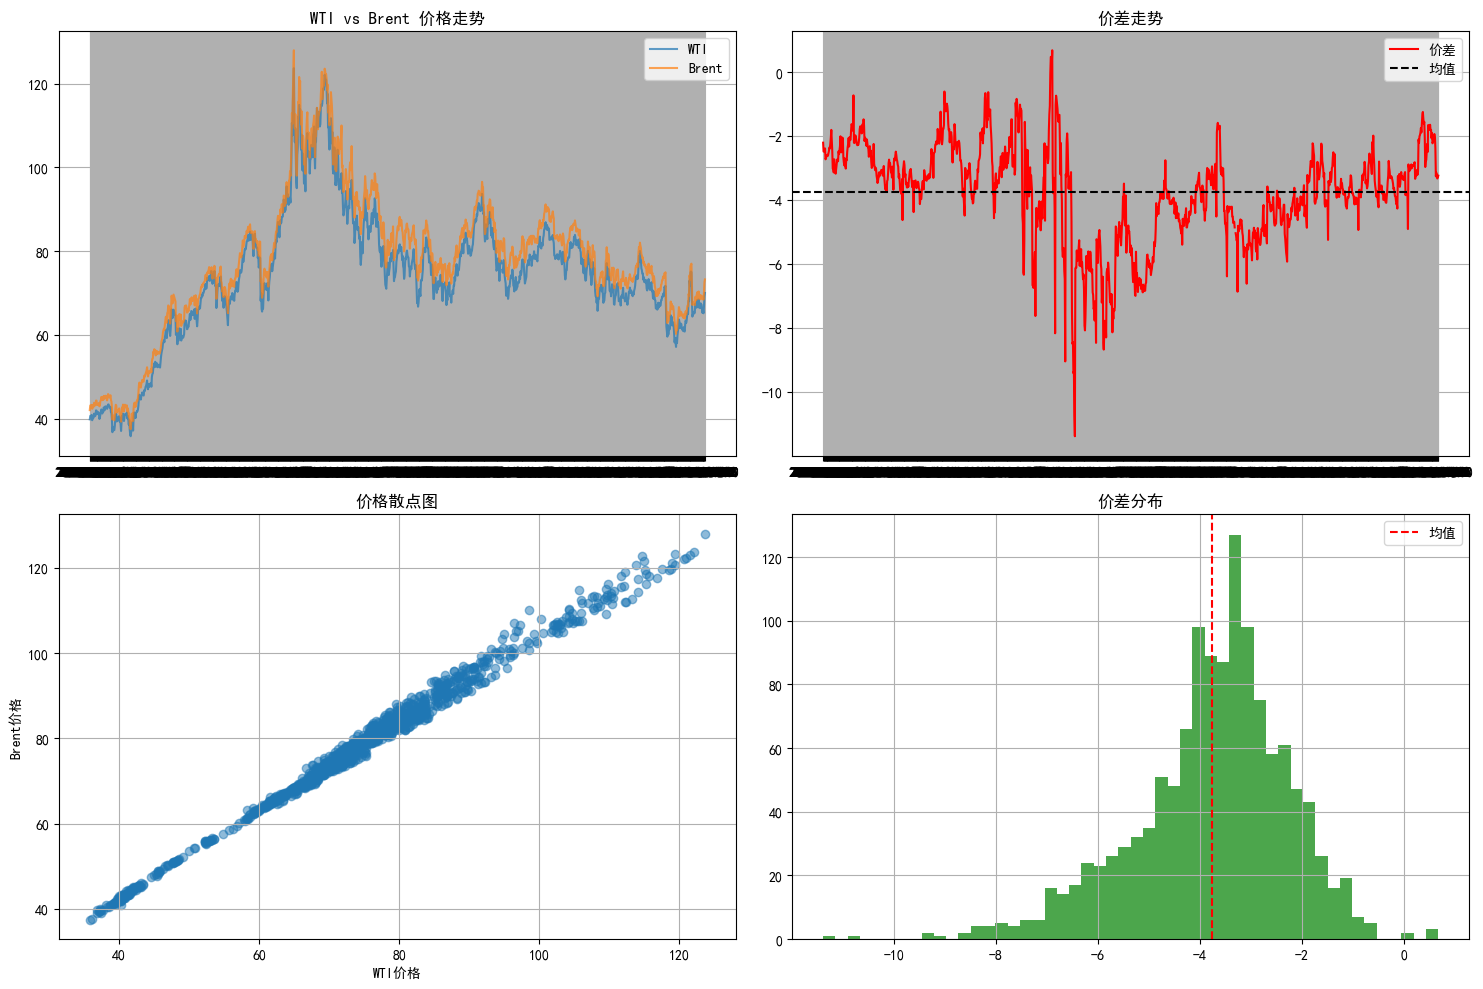

In [88]:
class CointegrationAnalysis:
    """协整性分析类"""
    
    def __init__(self, data1, data2):
        self.data1 = data1
        self.data2 = data2
        self.spread = data1 - data2
    
    def check_cointegration(self):
        """进行协整性检验"""
        # ADF检验价差的平稳性
        adf_result = adfuller(self.spread.dropna())
        print(f"ADF统计量: {adf_result[0]:.4f}")
        print(f"P值: {adf_result[1]:.4f}")
        
        # 协整检验
        score, pvalue, _ = coint(self.data1, self.data2)
        print(f"协整检验统计量: {score:.4f}")
        print(f"协整检验P值: {pvalue:.4f}")
        
        # 判断是否协整
        is_cointegrated = pvalue < 0.05
        print(f"是否协整: {is_cointegrated}")
        
        return is_cointegrated, pvalue
    
    def calculate_correlation(self):
        """计算相关性"""
        correlation = self.data1.corr(self.data2)
        print(f"价格相关系数: {correlation:.4f}")
        
        returns_corr = self.data1.pct_change().corr(self.data2.pct_change())
        print(f"收益率相关系数: {returns_corr:.4f}")
        
        return correlation, returns_corr
    
    def plot_analysis(self):
        """绘制分析图表"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # 价格走势
        axes[0, 0].plot(self.data1, label='WTI', alpha=0.7)
        axes[0, 0].plot(self.data2, label='Brent', alpha=0.7)
        axes[0, 0].set_title('WTI vs Brent 价格走势')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # 价差走势
        axes[0, 1].plot(self.spread, label='价差', color='red')
        axes[0, 1].axhline(self.spread.mean(), color='black', linestyle='--', label='均值')
        axes[0, 1].set_title('价差走势')
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        
        # 散点图
        axes[1, 0].scatter(self.data1, self.data2, alpha=0.5)
        axes[1, 0].set_xlabel('WTI价格')
        axes[1, 0].set_ylabel('Brent价格')
        axes[1, 0].set_title('价格散点图')
        axes[1, 0].grid(True)
        
        # 价差分布
        axes[1, 1].hist(self.spread, bins=50, alpha=0.7, color='green')
        axes[1, 1].axvline(self.spread.mean(), color='red', linestyle='--', label='均值')
        axes[1, 1].set_title('价差分布')
        axes[1, 1].legend()
        axes[1, 1].grid(True)
        
        plt.tight_layout()
        plt.show()

# 进行协整性分析
analyzer = CointegrationAnalysis(train_data['WTI'], train_data['Brent'])
is_cointegrated, pvalue = analyzer.check_cointegration()
correlation, returns_corr = analyzer.calculate_correlation()
analyzer.plot_analysis()


In [125]:
from sklearn.model_selection import TimeSeriesSplit

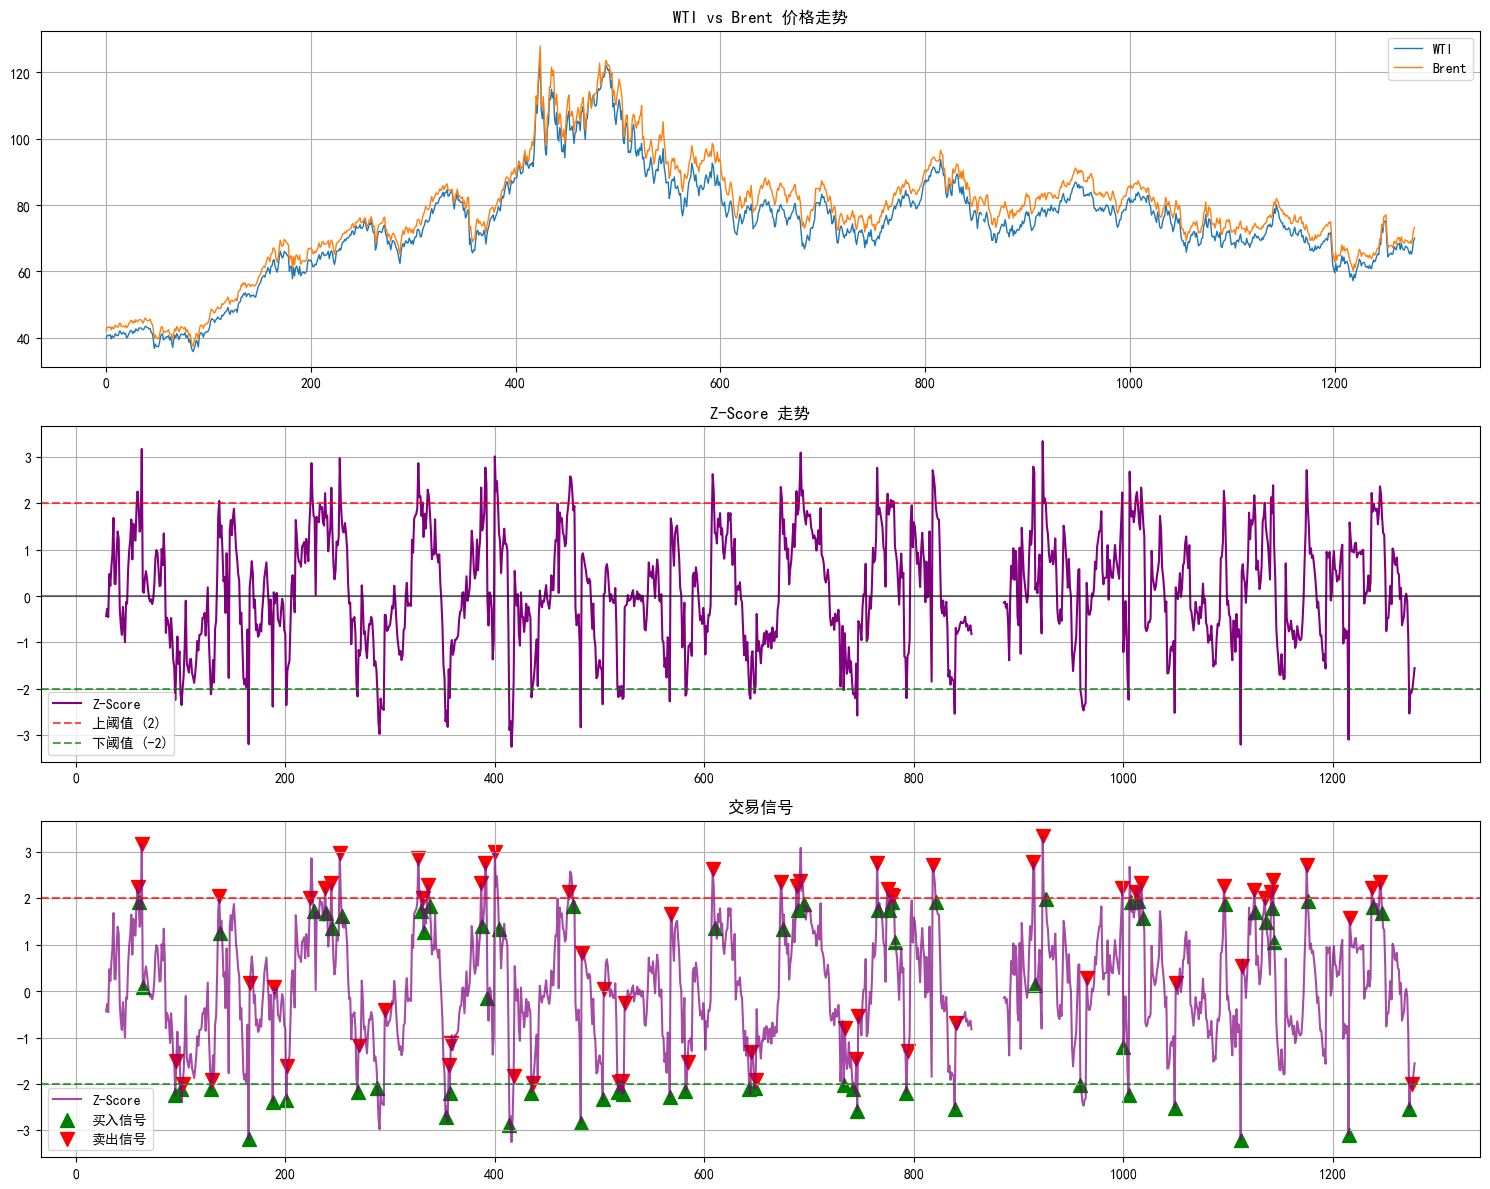

In [ ]:
class PairTradingStrategy:
    """配对交易策略类"""
    def __init__(self, lookback_window=30):
        self.lookback_window = lookback_window
        self.signals = None
        
    def calculate_zscore(self, spread):
        """计算Z-score"""
        spread_mean = spread.rolling(window=self.lookback_window).mean()
        spread_std = spread.rolling(window=self.lookback_window).std()
        z_score = (spread - spread_mean) / spread_std
        return z_score
    
    def generate_signals(self, wti_prices, brent_prices):
        """生成交易信号"""
        spread = wti_prices - brent_prices
        z_score = self.calculate_zscore(spread)
        
        signals = pd.DataFrame(index=wti_prices.index)
        signals['spread'] = spread
        signals['z_score'] = z_score
        
        # 生成交易信号
        signals['position'] = 0
        signals['signal'] = 0
        
        # 交易逻辑：当Z-score超过±2时开仓，回归到0时平仓
        signals.loc[z_score > 2, 'signal'] = -1  # WTI低估，做多WTI做空Brent
        signals.loc[z_score < -2, 'signal'] = 1   # WTI高估，做空WTI做多Brent
        signals.loc[abs(z_score) < 0.5, 'signal'] = 0  # 平仓
        
        signals['position'] = signals['signal'].diff()
        
        return signals
    
    def plot_signals(self, prices, signals):
        """绘制交易信号"""
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
        
        # 价格走势
        ax1.plot(prices.index, prices['WTI'], label='WTI', linewidth=1)
        ax1.plot(prices.index, prices['Brent'], label='Brent', linewidth=1)
        ax1.set_title('WTI vs Brent 价格走势')
        ax1.legend()
        ax1.grid(True)
        
        # Z-score
        ax2.plot(signals.index, signals['z_score'], label='Z-Score', color='purple')
        ax2.axhline(2, color='red', linestyle='--', alpha=0.7, label='上阈值 (2)')
        ax2.axhline(-2, color='green', linestyle='--', alpha=0.7, label='下阈值 (-2)')
        ax2.axhline(0, color='black', linestyle='-', alpha=0.5)
        ax2.set_title('Z-Score 走势')
        ax2.legend()
        ax2.grid(True)
        
        # 交易信号
        buy_signals = signals[signals['position'] == 1]
        sell_signals = signals[signals['position'] == -1]
        
        ax3.plot(signals.index, signals['z_score'], label='Z-Score', color='purple', alpha=0.7)
        ax3.scatter(buy_signals.index, buy_signals['z_score'], color='green', marker='^', s=100, label='买入信号')
        ax3.scatter(sell_signals.index, sell_signals['z_score'], color='red', marker='v', s=100, label='卖出信号')
        ax3.axhline(2, color='red', linestyle='--', alpha=0.7)
        ax3.axhline(-2, color='green', linestyle='--', alpha=0.7)
        ax3.set_title('交易信号')
        ax3.legend()
        ax3.grid(True)
        
        plt.tight_layout()
        plt.show()

# 生成交易信号
strategy = PairTradingStrategy(lookback_window=30)
train_signals = strategy.generate_signals(train_data['WTI'], train_data['Brent'])
strategy.plot_signals(train_data, train_signals)


In [121]:
all_data = pd.concat([train_data,test_data])
all_data

,Date,WTI,Brent
0,2020-07-01,39.820000,42.029999
1,2020-07-02,40.650002,43.139999
2,2020-07-06,40.630001,43.099998
3,2020-07-07,40.619999,43.080002
4,2020-07-08,40.900002,43.290001
...,...,...,...
17,2025-08-25,64.800003,68.800003
18,2025-08-26,63.250000,67.220001
19,2025-08-27,64.150002,68.050003
20,2025-08-28,64.599998,68.620003


C:\Users\lenovo1\AppData\Local\Temp\ipykernel_61624\4241415567.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.00751343]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio.loc[long_wti_mask, 'strategy_returns'] = (


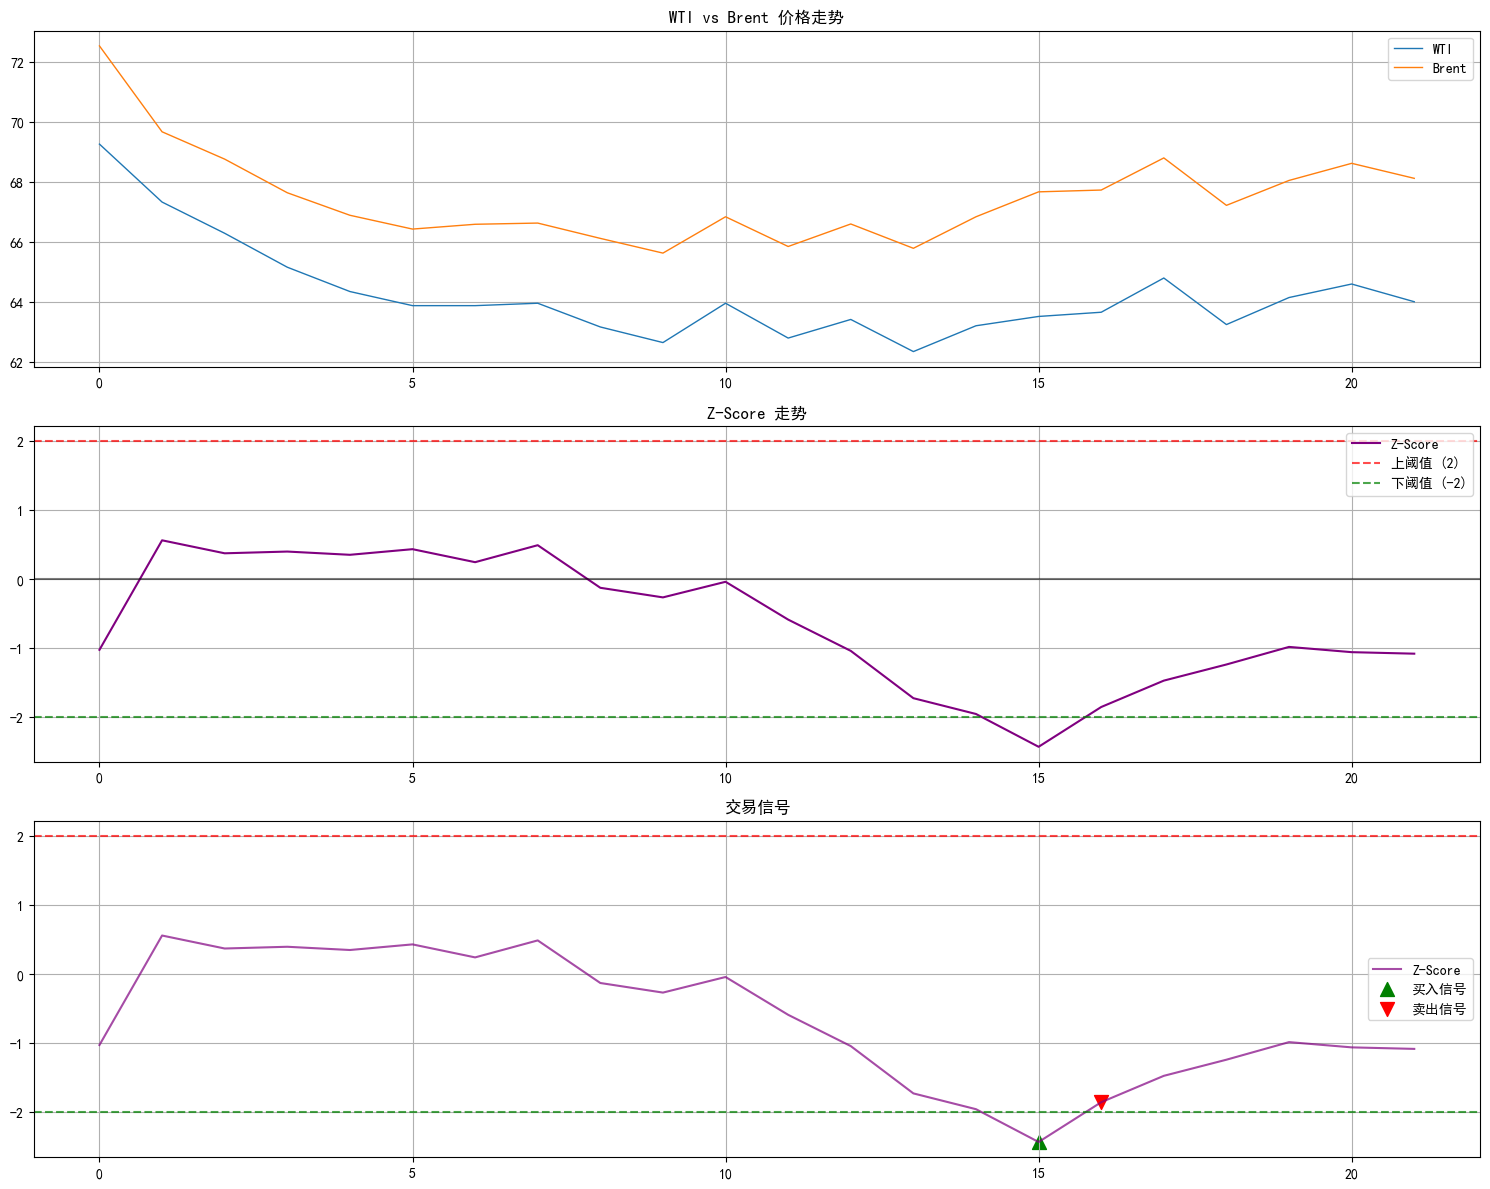

训练集性能指标:
总收益率: 0.0075
年化收益率: 0.0895
年化波动率: 0.0254
夏普比率: 3.5206
最大回撤: 0.0000
胜率: 1.0000
总交易次数: 1
Calmar Ratio: nan


In [ ]:
class RiskParityBacktestEngine(BacktestEngine):
    def calculate_weights(self, returns):
        cov = returns.cov()
        inv_sqrt_diag = 1 / np.sqrt(np.diag(cov))
        weights = inv_sqrt_diag / inv_sqrt_diag.sum()
        return weights
    
class BacktestEngine:
    """回测引擎类"""
    
    def __init__(self, initial_capital=100000):
        self.initial_capital = initial_capital
        self.results = None
        
    def run_backtest(self, prices, signals):
        """运行回测"""
        # 初始化持仓和资金
        portfolio = pd.DataFrame(index=signals.index)
        portfolio['price_wti'] = prices['WTI']
        portfolio['price_brent'] = prices['Brent']
        portfolio['signal'] = signals['signal']
        
        # 计算持仓
        portfolio['position'] = signals['signal']
        
        # 计算收益率
        portfolio['wti_returns'] = portfolio['price_wti'].pct_change()
        portfolio['brent_returns'] = portfolio['price_brent'].pct_change()
        
        # 计算策略收益率（假设等权重）
        portfolio['strategy_returns'] = 0
        
        # 当做多WTI做空Brent时
        long_wti_mask = portfolio['position'] == 1
        portfolio.loc[long_wti_mask, 'strategy_returns'] = (
            portfolio.loc[long_wti_mask, 'brent_returns'] - 
            portfolio.loc[long_wti_mask, 'wti_returns']
        )
        
        # 当做空WTI做多Brent时
        short_wti_mask = portfolio['position'] == -1
        portfolio.loc[short_wti_mask, 'strategy_returns'] = (
            portfolio.loc[short_wti_mask, 'wti_returns'] - 
            portfolio.loc[short_wti_mask, 'brent_returns']
        )
        
        # 计算累计收益
        portfolio['cumulative_strategy'] = (1 + portfolio['strategy_returns']).cumprod()
        portfolio['cumulative_wti'] = (1 + portfolio['wti_returns']).cumprod()
        portfolio['cumulative_brent'] = (1 + portfolio['brent_returns']).cumprod()
        
        # 计算基准（等权重买入持有）
        portfolio['benchmark_returns'] = (portfolio['wti_returns'] + portfolio['brent_returns']) / 2
        portfolio['cumulative_benchmark'] = (1 + portfolio['benchmark_returns']).cumprod()
        
        self.results = portfolio
        return portfolio
    
    def calculate_performance_metrics(self):
        """计算性能指标"""
        returns = self.results['strategy_returns'].dropna()
        benchmark_returns = self.results['benchmark_returns'].dropna()
        
        # 基本指标
        total_return = self.results['cumulative_strategy'].iloc[-1] - 1
        annual_return = (1 + total_return) ** (252 / len(returns)) - 1
        volatility = returns.std() * np.sqrt(252)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0
        
        # 最大回撤
        cumulative = self.results['cumulative_strategy']
        peak = cumulative.expanding().max()
        drawdown = (cumulative - peak) / peak
        max_drawdown = drawdown.min()
        
        # 胜率
        winning_trades = (returns > 0).sum()
        total_trades = (returns != 0).sum()
        win_rate = winning_trades / total_trades if total_trades > 0 else 0

        # Calmar Ratio
        calmar_ratio = annual_return / (-max_drawdown) if max_drawdown < 0 else np.nan
        
        metrics = {
            '总收益率': total_return,
            '年化收益率': annual_return,
            '年化波动率': volatility,
            '夏普比率': sharpe_ratio,
            '最大回撤': max_drawdown,
            '胜率': win_rate,
            '总交易次数': total_trades,
            'Calmar Ratio': calmar_ratio
        }
        
        return metrics
    
    def plot_performance(self):
        """绘制性能图表"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
        
        # 累计收益对比
        ax1.plot(self.results.index, self.results['cumulative_strategy'], 
                label='配对交易策略', linewidth=2)
        ax1.plot(self.results.index, self.results['cumulative_benchmark'], 
                label='基准（等权重）', linewidth=2, linestyle='--')
        ax1.set_title('策略累计收益对比')
        ax1.legend()
        ax1.grid(True)
        ax1.set_ylabel('累计收益')
        
        # 回撤曲线
        cumulative = self.results['cumulative_strategy']
        peak = cumulative.expanding().max()
        drawdown = (cumulative - peak) / peak
        
        ax2.fill_between(self.results.index, drawdown, 0, alpha=0.3, color='red')
        ax2.plot(self.results.index, drawdown, color='red', linewidth=1)
        ax2.set_title('策略回撤曲线')
        ax2.set_ylabel('回撤')
        ax2.set_xlabel('日期')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

# 运行回测
test_strategy = PairTradingStrategy(lookback_window=15)
all_data_signals = test_strategy.generate_signals(all_data['WTI'], all_data['Brent'])
test_signals = all_data_signals[-22:]
backtest = BacktestEngine(initial_capital=100000)
train_results = backtest.run_backtest(test_data, test_signals)
metrics = backtest.calculate_performance_metrics()
strategy.plot_signals(test_data, test_signals)

print("训练集性能指标:")
for key, value in metrics.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")


In [118]:
test_signals

,spread,z_score,position,signal
0,-3.269997,-1.026100,0.0,0
1,-2.339996,0.561835,0.0,0
2,-2.470001,0.373498,0.0,0
3,-2.479996,0.398744,0.0,0
4,-2.540001,0.351752,0.0,0
5,-2.549999,0.433201,0.0,0
6,-2.709995,0.244640,0.0,0
7,-2.669998,0.490896,0.0,0
8,-2.950005,-0.126766,0.0,0
9,-2.979996,-0.265855,0.0,0
